<a href="https://colab.research.google.com/github/BrianBock/ENPM673-Project6/blob/master/Small_ENPM673_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENPM 673 Project 6 - Image Classification via CNN
Justin Albrecht & Brian Bock

##Helpful Sources/References

https://medium.com/@navneetkumar11/loading-image-data-from-google-drive-to-google-colab-using-pytorchs-dataloader-2e5617978a63

https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c

https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d

https://colab.research.google.com/drive/1gCgtlnMPVWY0l1ra8ssS0EzJiWaVR4Pk#scrollTo=Su0COdCqT2Wk

https://colab.research.google.com/drive/1Dr2kMGXjI_oi6x4Mke1PhPrWVe-3vQFm#scrollTo=AR6dYomrHZWr

https://drive.google.com/file/d/1-aBdwzhJ3GXmqat1CBrjbdQF04Rj54Lj/view

https://stackoverflow.com/questions/50052295/how-do-you-load-images-into-pytorch-dataloader

https://towardsdatascience.com/a-beginners-tutorial-on-building-an-ai-image-classifier-using-pytorch-6f85cb69cba7

In [0]:
# Import required Python packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive

# Import our own packages (if any)


In [2]:
# Mount drive (slow step, so we only want to do it once)
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_path = "/content/gdrive/My Drive/2020/Spring 2020/ENPM673/Project 6/dogs-vs-cats/med_train"
train_set = datasets.ImageFolder(image_path, transform = transformations)

# vgg16 = models.vgg16(pretrained=True)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

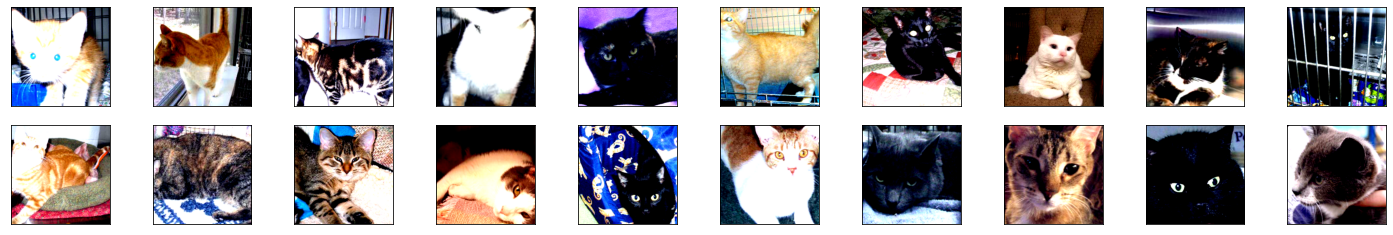

In [12]:
# View images to verify import
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

    
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [13]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break



Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])


In [14]:

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(222 * 222 * 32, 128)
        self.d2 = nn.Linear(128, 2)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break


batch size: torch.Size([32, 3, 224, 224])
torch.Size([32, 2])


In [9]:
BATCH_SIZE=32
# Train the Model
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))    




Epoch: 0 | Loss: 0.8377 | Train Accuracy: 51.88
Epoch: 1 | Loss: 0.8578 | Train Accuracy: 52.29
Epoch: 2 | Loss: 0.8175 | Train Accuracy: 52.29
Epoch: 3 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 4 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 5 | Loss: 0.8578 | Train Accuracy: 52.29
Epoch: 6 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 7 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 8 | Loss: 0.8578 | Train Accuracy: 52.29
Epoch: 9 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 10 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 11 | Loss: 0.8175 | Train Accuracy: 52.29
Epoch: 12 | Loss: 0.8175 | Train Accuracy: 52.29
Epoch: 13 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 14 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 15 | Loss: 0.8376 | Train Accuracy: 52.29
Epoch: 16 | Loss: 0.8578 | Train Accuracy: 52.29
Epoch: 17 | Loss: 0.8175 | Train Accuracy: 52.29
Epoch: 18 | Loss: 0.8578 | Train Accuracy: 52.29
Epoch: 19 | Loss: 0.8779 | Train Accuracy: 52.29
Epoch: 20 | Loss: 0.8376 | Tra

In [0]:
# Test the Model
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))